In [43]:
from functions import *
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [4]:
df = pd.read_csv('data_for_model.csv', usecols = ['review_rating' , 'Reviews_tokenize_join'])
df.head()

,review_rating,Reviews_tokenize_join
0,1,start say understand hard time city country en...
1,5,wonderful visit time park view thank upgrade l...
2,5,good hotel stay absolutely worth money view ce...
3,5,fantastic location spot step central park view...
4,5,amazing park view nicole staff professional fr...


In [5]:
pol = lambda x: TextBlob(x).sentiment.polarity
df['polarity'] = df['Reviews_tokenize_join'].apply(pol)

In [12]:
 #create a new feature called label
df['binary_sentiment'] = ['positive' if x > 0  else 'negative' for x in df['polarity']]


In [13]:
df['binary_sentiment'].value_counts(normalize= True)

positive    0.911816
negative    0.088184
Name: binary_sentiment, dtype: float64

In [14]:
def plot_binary(df , column):
    ''' plot for the binary target '''
    plt.figure(figsize=(8,6))
    sns.countplot(df[column], order=["positive", "negative"], palette='Set3')
    plt.title('Positive and Negative Reviews',fontsize=20)
    plt.xlabel('Type of Review', fontsize=16)
    plt.ylabel('Number of Reviews', fontsize=16)

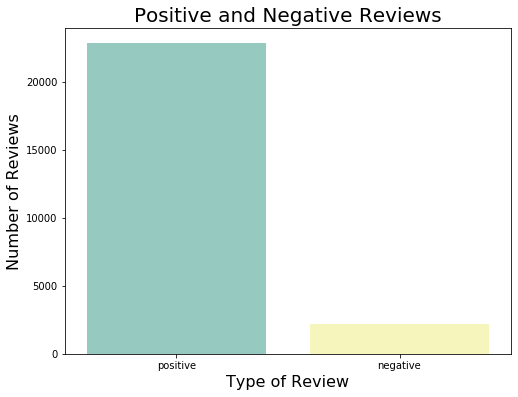

In [15]:
plot_binary(df, 'binary_sentiment')

In [ ]:
# another way

In [18]:
analyser = SentimentIntensityAnalyzer()


In [25]:
df['pos'] = df['Reviews_tokenize_join'].apply(lambda x:analyser.polarity_scores(x)['pos'])

In [21]:
df['neg'] = df['Reviews_tokenize_join'].apply(lambda x:analyser.polarity_scores(x)['neg'])

In [22]:
df['neu'] = df['Reviews_tokenize_join'].apply(lambda x:analyser.polarity_scores(x)['neu'])

In [23]:
df['compound'] = df['Reviews_tokenize_join'].apply(lambda x:analyser.polarity_scores(x)['compound'])

In [38]:
pos_review = [u for i,u in enumerate(df['Reviews_tokenize_join']) if df['compound'][i] > 0.2]

In [29]:
neu_review = [u for i,u in enumerate(df['Reviews_tokenize_join']) if 0.2>=df['compound'][i] >=- 0.2]

In [30]:
neg_review = [u for i,u in enumerate(df['Reviews_tokenize_join']) if df['compound'][i] < -0.2]

In [32]:
def getting_percentages (l_, word):
    print(f'Percentage of {word} is {len(l_) *100/len(df["Reviews_tokenize_join"]) }')

In [33]:
getting_percentages(pos_review,  'positive')

Percentage of positive is 91.0938123752495


In [34]:
getting_percentages(neu_review,  'neutral')

Percentage of neutral is 3.3253493013972055


In [35]:
getting_percentages(neg_review,  'negative')

Percentage of negative is 5.580838323353293
